<a href="https://colab.research.google.com/github/sidbannet/converge_cfd_user/blob/develop/An_open_source_technical_computing_platform_to_analyze_CONVERGE_CFD_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
---

> This is an example notebook showing how to load [CONVERGE CFD](https://convergecfd.com/) results in your python analysis framework


**Disclaimer**

The data and plots presented here is from CONVERGE benchmark example available publicly with CONVERGE.

## About author

Dr. Banerjee is currently leading CFD modeling at [Mainspring Energy Inc.](www.mainspringenergy.com) a clean energy startup based in the San Francisco Bay Area.

Dr. Banerjee has 12 years of experience focused in the areas of computational combustion, propulsion, and clean energy technology. After earning a Ph.D. from the [University of Wisconsin - Madison](www.wisc.edu) in 2011, Dr. Banerjee worked in the Corporate R&D division of [Cummins Inc.](www.cummins.com) for several years. In 2016, he received Director's award at [Oak Ridge Leadership Computing Facility](https://www.olcf.ornl.gov/) along with DOE funding to work on novel combustion engine technology. Throughout his career, he collaborated with several National Labs and Convergent Science engineers to bring cutting-edge clean energy technology to market using high-performance computer simulation models. He published over [25 technical papers](https://scholar.google.com/citations?user=eTX1dWAAAAAJ&hl=en), authored several patents, and served in several organizing committees at _ASME's IC Engine Division_ over the years.

---
| [Github](https://github.com/sidbannet) | [LinkedIn](https://www.linkedin.com/in/sidban/) | [Email](mailo:sidban@uwalumni.com) | [Mainspring Energy Inc.](https://www.mainspringenergy.com/) (we are hiring !!!) |

## Abstract

[A python-based open-source technical computing platform](https://github.com/sidbannet/converge_cfd_user) is developed for the users of CONVERGE CFD. Using this platform, one can analyze CFD data, share the analysis results with other team members and integrate the analysis with other simulation or test platforms for model integrations and validations. The platform is available through the version control system using Git, with the ability to continuously improve by the user community's contributors. Using widely distributed Python libraries, powerful data analysis tools can be employed to further analyze capabilities and derive meta-models. Furthermore one can deploy these python tools to analyze the simulation data on the fly while their simulation is running. This can enable rapid decision-making capability on their numerical experiment(s).

## Why open-source CONVERGE user community?

* Increasingly *CFD* is used in conjunction with *data-science* to use as a powerful predictive tool for analysis-led development and to accelerate R&D. Meta-models and optimization methods like **Resopnse Surace**, **Optimization on Manifolds**, **Genetic algorithim** optimization and **Decision Tree / Random Forest** are used by large number of CONVERGE users these days.
* [Python](https://www.python.org/) is most popular scientific computing language to perform data-science / analysis
* Web-based version control platforms like [github](https://github.com/) provides an opportunity to collaborate with CONVERGE developers and users in open-source forum and learn from each other and to advance CFD data-analysis further.


### Few more reasons

* Most of CFD reports are static slides / pages. Using [Jupyter Notebook](https://jupyter.org/) you can create a CFD result dashboard and integrate it with reports / presentations.
> Example: [COVID dashboard](https://gist.github.com/sidbannet/5f344203c1811696a0c8c51500323052) (report orginally published in Novmber 2020) using Jupyter Notebook is still up-to-date with a single click.
* Code lives with your report.
> Embedding code in your presentation is powerful. You can **interact** with the report and draw insights faster.
* Easier to collaborate
> * **Peers**: You can bring in test data within your CFD analysis easily and compare / validate your model faster and better.
  * **CONVERGE developers / External collaborators**: Easier to share your data and analysis with CONVERGE support and collaborators.

* Live analysis and HPC job management
  * **HPC cloud platform**: You can have your code live alongside the simulation and have live data-anlysis while simulation is running. 
  * You can **manage** your HPC jobs based on pre-set criteria (like emissions, efficiency etc.).


# Get started with code repository

**Note: You don't need to do this if you have already cloned the repository and using an IDE !!!**


In [ ]:
#@markdown * Clone the [repository](https://github.com/sidbannet/converge_cfd_user)
#@markdown * Initialize the project

#@markdown

try:
    import google.colab
    !git clone https://github.com/sidbannet/converge_cfd_user.git
    %cd ./converge_cfd_user
except:
    print('Not on colab, this cell need not be executed.')

# Loading CONVERGE results

* Import nessesary packages
* Instantiate an [an example benchmark CFD case](https://convergecfd.com/benefits/high-performance-computing) for post processing
* Load timeseries data from the example CFD result

In [ ]:
#@title Code to import packages
#@markdown > `from post.process import SimpleCase as CfdCase` will give `CfdCase` class in your analysis

from post.process import SimpleCase as CfdCase
import matplotlib.pyplot as plt

In [ ]:
#@title Instantiate an example `cfd_obj` case from a given _case directory_
#@markdown If all your CFD results files `*.echo` and `*.out` are in `proj_dir/proj_name` directory, then you can instantiate your python object like this example below:
#@markdown > `cfd_obj = CfdCase(proj_dir, proj_name)` will instantiate `cfd_obj` with all nessesary properties and methods

example = CfdCase(proj_dir='./examples', proj_name='test_example')

In [ ]:
#@title Load CFD data
#@markdown > `cfd_obj.load_cfd_data()` will loadd all CFD timeseries data in `cfd_obj`
if not example._loaded_data:
    example.load_cfd_data()

# Few examples of presenting the data from `cfd_obj`

* Plot timeseries of in-cylinder pressure trace
* Get echo file metadata
> Such as `RPM` from `engine.echo`
* Get **pV** diagram in *log-log* scale
* Plot timeseries of in-cylinder emissions - An interactive example
* Plot minor species data
* Get in-cylinder temperature vs. equivalance ratio trajectory

In [ ]:
#@title Plot pressure trace
#@markdown > `(cfd_obj.thermo.all.Pressure * 10).plot(title='Pressure trace')` will give you pressure trace

axs = (example.thermo.all.Pressure * 10).plot(label='example', style='-', color='k', grid=True, title='Pressure trace')
_ = axs.set_ylabel('Pressure [bar]')

In [ ]:
#@title Get `echo` file metadata
#@markdown > `cfd_obj._get_echo_file(file_name='engine.echo', eng_info='rpm')` will give RPM information from `engine.echo` file
print('Engine speed is: ', example._get_echo_info(file_name='engine.echo', eng_info='rpm'), ' RPM')

In [ ]:
#@title Get PV diagram
#@markdown > `axs = cfd_obj.thermo.all.plot(x='Volume', y='Pressure')` will plot **pV** diagram
#@markdown > `axs.set_xscale('log'), axs.set_yscale('log')` will make diagram on *log-log* scale
axs = example.thermo.all.plot(
    x='Volume',
    y='Pressure',
    style='-.',
    color='k',
    grid=False,
    title='PV diagram'
)
_ = axs.set_xscale('log'), axs.set_yscale('log')

In [ ]:
#@title Get timeseries of in-cylinder chemical species mass
#@markdown > `cfd_obj.species.all['OH'].plot()` will plot *OH* species against crank angle

minor_species_1 = "OH" #@param ["OH", "CH2O"] {allow-input: true}
minor_species_2 = "CH2O" #@param ["OH", "CH2O"] {allow-input: true}
axs = example.species.all[minor_species_1].plot(label=minor_species_1)
example.species.all[minor_species_2].plot(ax=axs, label=minor_species_2, title='Minor species', grid=True)
_ = axs.set_ylabel(example.species.all.unit_[minor_species_1])
_ = axs.legend()

In [ ]:
#@title Get emission data

#@markdown Interactive `xy` plot for in-cylinder emission trajectory
#@markdown > You can choose `x` and `y` data to plot interactively. Also you can choose start and stop crank time using sliders.

#@markdown **Choose with these options:**
x = "Rct_Phi_Mean" #@param ["Rct_Phi_Mean", "Phi_Mean", "Lambda_Mean", "Rct_Lmda_Mean"]
y = "Max_Temp" #@param ["Max_Temp", "Mean_Temp", "Pressure"]
Plot_Title = "Emission trajectory" #@param ["Emissions"] {allow-input: true}
crank_time_min = -11 #@param {type: "slider", min: -100, max: 0}
crank_time_max = 30  #@param {type: "slider", min: -0, max: 200}

#@markdown *Interactive plot*

#@markdown ---

df_x = example.mixing.all[x]
df_y = example.thermo.all[y]

x_unit = example.mixing.all.unit_[x]
y_unit = example.thermo.all.unit_[y]

fig = plt.figure('Emission trajecory')
axs = fig.subplots(nrows=1, ncols=1)

axs.plot(df_x[crank_time_min:crank_time_max], df_y[crank_time_min:crank_time_max], '-.k')
_ = axs.set_xlabel(x + ' ' + x_unit), axs.set_ylabel(y + ' ' + y_unit)
axs.grid(True)
_ = axs.set_title(Plot_Title)
fig.set_size_inches(w=8, h=6)

# Remarks

**Pointers**
* All your `thermo` data is in `cfd_obj.thermo.all`. If you want to access `thermo_region3` data, use `cfd_obj.thermo.region[3]`
* You don't need to append `thermo_region0.out` with restarts like `thermo1_region0.out`. If all the `*.out` and `*.echo` files are in same `proj_dir/proj_name` directory, `cfd_obj.load_data()` will load all your results.
* Similarly all `mixing` data will be available in `cfd_obj.mixing.all` and/or `cfd.mixing.region` and so on for all `*.out` timeseries data.
* To get region 0 pressure data from `thermo*_region0.out`, use `cfd_obj.thermo.region[0].Pressure`.
* If you want to load another project (CFD case), use new object.

**FAQs**
1. How to load data when there are multiple restarts in a perticular project?
> `pandas` append takes care of it. You don't need to do anything special.
2. Can I add my own methods / functions to do further analysis?
> Yes, use [python's inheritance](https://www.w3schools.com/python/python_inheritance.asp) to built your own methods / functions.
3. How can I get started with this?
> * Install `git` if you don't have already. Here is a helpful [link](https://git-scm.com/book/en/v2/Getting-Started-Installing-Git) to install git
> * Clone the repository using `git clone https://github.com/sidbannet/converge_cfd_user.git`
> * Install popular open-source data science toolkit like [conda](https://www.anaconda.com/products/individual-d)
> * Use your choice of *Integrated Development Environment* like [Pycharm](https://www.jetbrains.com/pycharm/) or [Spyder](https://www.spyder-ide.org/) or [Visual Studio](https://visualstudio.microsoft.com/) to build your version of this code.
4. How can I contribute to this "open-source" code repository?
> Use **Github**'s feature to 
> * Conribute (Helps this community grow)
> * Fork (have your own version of this code repository)
> * Write [me](mailto:sidban@uwalumni.com) if you have any questions


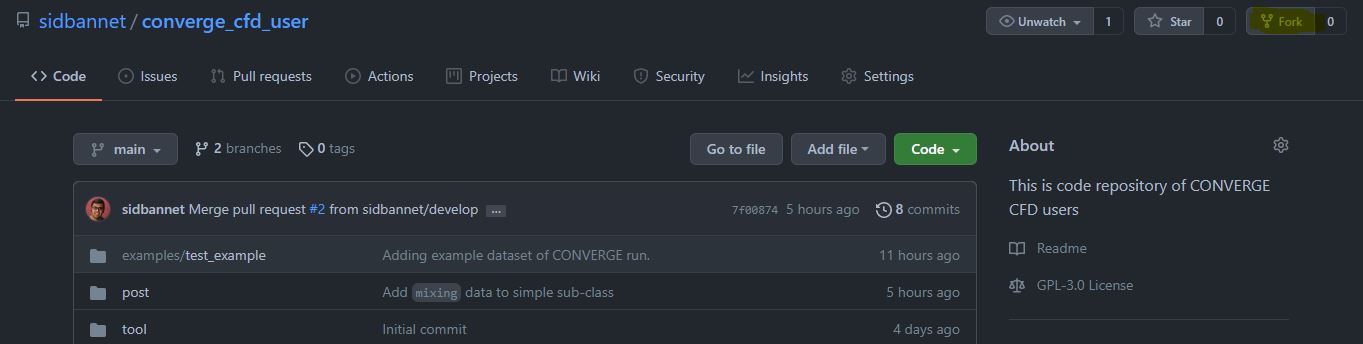
